## Can we predict what kind of songs will be popular on Spotify based on their statistics?

As someone who listens to Spotify on an average of 6 hours everyday, I am always on the lookout for new songs. To go look at those songs, I check what's popular at a certain time. As new songs are released everyday, only a handful of them rise the billboards to become "popular", despite it taking a bit of time to reach everyone's ears. Can we see if there is a trend with what songs are popular, and can we also see if we can predict what songs will be considered popular based on their specifications?

# Data Exploration and Cleaning

In [69]:
# Import all the libraries necessary for our analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, fbeta_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn import ensemble
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from IPython.display import Image
import statsmodels.api as sm

In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install pydotplus

In [50]:
import pydotplus

In [4]:
# This dataset is from Kaggle where it contains over 175,000 tracks released between 1921 and 2020, and also contains data for each song.

spotify_df = pd.read_csv('https://github.com/jlc0523/Capstone2-Spotify/blob/main/data.csv?raw=true')

In [5]:
# Right off the bat, I've identified the column 'release_date' can be removed. So we will drop them.

spotify_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [6]:
spotify_df.drop(columns = 'release_date', inplace = True)

In [7]:
# Combining two columns into one for readability sake, also to check for any duplicate songs

spotify_df['name_artists'] = spotify_df.apply(lambda x: x['name'] + x['artists'], axis = 1)
spotify_df.drop(columns = ['artists', 'name'], inplace = True)

In [8]:
spotify_df.head()

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,name_artists
0,0.991000,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920,Keep A Song In Your Soul['Mamie Smith']
1,0.643000,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920,"I Put A Spell On You[""Screamin' Jay Hawkins""]"
2,0.993000,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920,Golfing Papa['Mamie Smith']
3,0.000173,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920,True House Music - Xavier Santos & Carlos Gomi...
4,0.295000,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920,Xuniverxe['Mixe']


In [9]:
# I will check for any duplicate song-artist pairs. 

len(spotify_df[spotify_df['name_artists'].duplicated()])

14948

In [10]:
spotify_df[spotify_df['name_artists'] == 'Together[\'Roger Fly\']']

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,name_artists
170386,0.806,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92,4,0.113,-12.393,0,0,0.0282,108.058,0.714,2020,Together['Roger Fly']
174386,0.806,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92,4,0.113,-12.393,0,0,0.0282,108.058,0.714,2020,Together['Roger Fly']


In [11]:
# This one in particular, has different id's, as well as different popularity
# For the sake of popularity being based off of times it was played recently, I am going to keep the 
# duplicate song that has the higest popularity value

spotify_df[spotify_df['name_artists'] == 'champagne problems[\'Taylor Swift\']']

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,name_artists
19922,0.920,0.462,244000,0.240,1,0sY6ZUTh4yoctD8VIXz339,0.0,0,0.113,-12.077,1,85,0.0377,171.319,0.320,2020,champagne problems['Taylor Swift']
20128,0.921,0.462,244000,0.242,1,2EliNOReCRCe1ynR6G8yeT,0.0,0,0.113,-12.077,1,54,0.0376,171.352,0.320,2021,champagne problems['Taylor Swift']
158571,0.920,0.463,244000,0.248,0,6rap8NpGq8LDcVaJWkKFPn,0.0,0,0.113,-12.036,1,70,0.0374,171.346,0.325,2020,champagne problems['Taylor Swift']
174387,0.920,0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.0,0,0.113,-12.077,1,69,0.0377,171.319,0.320,2021,champagne problems['Taylor Swift']


In [12]:
# Remove duplicates, and keep the one with highest popularity score, if any

spotify_df2 = spotify_df.sort_values(['name_artists', 'popularity'], ascending = [True, False]).drop_duplicates('name_artists', keep = 'first')

In [13]:
spotify_df2.head()

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,name_artists
119259,0.099800,0.272,226200,0.684,0,2ZywW3VyVx6rrlrX75n3JB,0.0145,8,0.946,-9.728,1,38,0.0505,143.079,0.279,1983,"""40"" - Live['U2']"
86492,0.185000,0.371,157667,0.545,0,6DdWA7D1o5TU2kXWyCLcch,0.5820,8,0.183,-9.315,1,36,0.0307,150.316,0.310,1983,"""40"" - Remastered 2008['U2']"
151390,0.228000,0.368,157840,0.480,0,0tMgFpOrXZR6irEOLNWwJL,0.7070,8,0.159,-11.605,1,23,0.0306,150.166,0.338,1983,"""40""['U2']"
141487,0.000696,0.315,202493,0.970,0,25Sd73fleKUVPNqITPZkn1,0.0000,8,0.277,-4.709,1,51,0.1020,178.068,0.423,2012,"""45""['The Gaslight Anthem']"
8145,0.482000,0.615,151680,0.375,0,6CvreUbryAmXAUo35wuCQJ,0.0000,0,0.111,-10.362,0,43,0.0319,110.720,0.922,1961,"""A"" You're Adorable['Brian Hyland']"


In [14]:
spotify_df2.shape

(159441, 17)

In [15]:
# Looking for any null, nonsense values:
# Zero values for tempo does not make sense,
# So will look to drop those rows.

spotify_df2.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,159441.000000,159441.000000,1.594410e+05,159441.000000,159441.000000,159441.000000,159441.000000,159441.000000,159441.000000,159441.000000,159441.000000,159441.000000,159441.000000,159441.000000,159441.000000
mean,0.503599,0.535530,2.319757e+05,0.479543,0.070490,0.195795,5.206007,0.212591,-11.817814,0.702536,26.075470,0.109172,116.909877,0.524376,1976.482686
std,0.379469,0.175954,1.486517e+05,0.272141,0.255972,0.333249,3.519872,0.181415,5.690355,0.457144,22.007354,0.188806,30.339135,0.264345,26.711390
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.091500,0.413000,1.653600e+05,0.246000,0.000000,0.000000,2.000000,0.099700,-14.998000,0.000000,1.000000,0.035200,93.689000,0.311000,1955.000000
50%,0.528000,0.547000,2.049600e+05,0.460000,0.000000,0.000516,5.000000,0.139000,-10.906000,1.000000,26.000000,0.045600,115.714000,0.536000,1977.000000
75%,0.897000,0.668000,2.649070e+05,0.706000,0.000000,0.246000,8.000000,0.273000,-7.560000,1.000000,43.000000,0.077600,135.013000,0.743000,1998.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [16]:
spotify_df2['tempo'].replace(0, np.nan, inplace = True)
spotify_df2 = spotify_df2.dropna()

In [17]:
spotify_df2.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
valence             0
year                0
name_artists        0
dtype: int64

In [18]:
spotify_df2.reset_index()

,index,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,name_artists
0,119259,0.099800,0.272,226200,0.684,0,2ZywW3VyVx6rrlrX75n3JB,0.014500,8,0.9460,-9.728,1,38,0.0505,143.079,0.279,1983,"""40"" - Live['U2']"
1,86492,0.185000,0.371,157667,0.545,0,6DdWA7D1o5TU2kXWyCLcch,0.582000,8,0.1830,-9.315,1,36,0.0307,150.316,0.310,1983,"""40"" - Remastered 2008['U2']"
2,151390,0.228000,0.368,157840,0.480,0,0tMgFpOrXZR6irEOLNWwJL,0.707000,8,0.1590,-11.605,1,23,0.0306,150.166,0.338,1983,"""40""['U2']"
3,141487,0.000696,0.315,202493,0.970,0,25Sd73fleKUVPNqITPZkn1,0.000000,8,0.2770,-4.709,1,51,0.1020,178.068,0.423,2012,"""45""['The Gaslight Anthem']"
4,8145,0.482000,0.615,151680,0.375,0,6CvreUbryAmXAUo35wuCQJ,0.000000,0,0.1110,-10.362,0,43,0.0319,110.720,0.922,1961,"""A"" You're Adorable['Brian Hyland']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,167058,0.718000,0.577,220053,0.235,0,3TiVCPJrFiBzpAverOkPL1,0.000173,5,0.1030,-13.240,1,29,0.0325,127.818,0.175,1985,소녀['Lee Moon Sae']
159324,18639,0.288000,0.739,242480,0.475,0,7K9ZQZdMC30O66H7HD6Vhy,0.000000,2,0.0757,-8.920,0,8,0.3790,81.490,0.800,2012,"소년을 위로해줘 From Boys to Men 2013['Verbal Jint', ..."
159325,108244,0.022600,0.706,232333,0.972,0,5w18nowVMRZrC5Na9Vxoth,0.000003,11,0.2670,-2.359,0,61,0.0352,129.946,0.962,2009,"쏘리 쏘리 Sorry, Sorry['SUPER JUNIOR']"
159326,172269,0.245000,0.610,195693,0.840,0,7oEnx3neiNUlJRwBadUhAS,0.000000,2,0.1540,-4.543,1,60,0.0468,126.992,0.657,2011,애인만들기['SS501']


# Data visualization

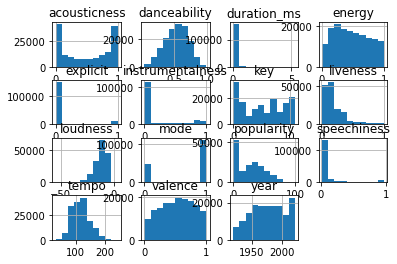

In [19]:
# Danceability is normally distributed
# There is a pretty even distribution of energy
# Popularity seems to be all over the place
# Instrumentalness, liveness, speechiness, 

spotify_df2.hist()
plt.show()

<AxesSubplot:>

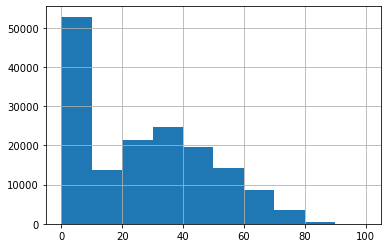

In [20]:
# Our target variable, populartiy, is based on a score from 0 to 100
# This is decided from Spotify's own algorithm where the popularity of a song 
# is based on recent plays.

spotify_df2['popularity'].hist()

In [21]:
# Going to set a new dataframe that contains only the numeric type of values
# in order to find any highly correlated variables and eventually feed
# it into our model.

spotify_num = spotify_df.select_dtypes(include = np.number)

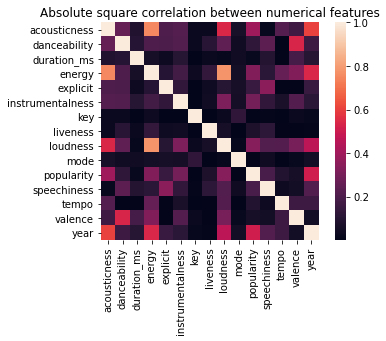

In [22]:
# Looks like loudness is heavily correlated with energy, so we will
# probably have to get rid of one of them

corr = np.abs(spotify_num.corr())
sns.heatmap(corr, square = True)
plt.title('Absolute square correlation between numerical features')
plt.show()

In [23]:
# Defined a function to delete columns of highly correlated variables

def remove_correlated_features(dataset, threshold=0.7):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]

    return dataset

In [24]:
remove_correlated_features(spotify_num)

Deleted loudness from dataset.


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,mode,popularity,speechiness,tempo,valence,year
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,0,12,0.0936,149.976,0.6340,1920
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,0,7,0.0534,86.889,0.9500,1920
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,1,4,0.1740,97.600,0.6890,1920
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,1,17,0.0425,127.997,0.0422,1920
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,0,2,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,0.792,147615,0.866,0,0.000060,6,0.1780,0,0,0.0356,125.972,0.1860,2020
174385,0.795000,0.429,144720,0.211,0,0.000000,4,0.1960,1,0,0.0360,94.710,0.2280,2021
174386,0.806000,0.671,218147,0.589,0,0.920000,4,0.1130,0,0,0.0282,108.058,0.7140,2020
174387,0.920000,0.462,244000,0.240,1,0.000000,0,0.1130,1,69,0.0377,171.319,0.3200,2021


In [25]:
spotify_num.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [26]:
# I don't think the key in which the song is in will contribute much, so will drop the column, as well as year

drop_column = ['key', 'year']

for column in drop_column:
    spotify_num.drop(columns = column, axis = 1, inplace = True)

C:\Users\jlc73\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
spotify_num.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,mode,popularity,speechiness,tempo,valence
0,0.991000,0.598,168333,0.224,0,0.000522,0.3790,0,12,0.0936,149.976,0.6340
1,0.643000,0.852,150200,0.517,0,0.026400,0.0809,0,7,0.0534,86.889,0.9500
2,0.993000,0.647,163827,0.186,0,0.000018,0.5190,1,4,0.1740,97.600,0.6890
3,0.000173,0.730,422087,0.798,0,0.801000,0.1280,1,17,0.0425,127.997,0.0422
4,0.295000,0.704,165224,0.707,1,0.000246,0.4020,0,2,0.0768,122.076,0.2990


In [28]:
# One more thing before we start the modelling process, convert duration into seconds, rather than milliseconds
# so that it's easier to read

spotify_num['duration_ms'] = spotify_num['duration_ms'].div(1000).round(3)

<ipython-input-28-2f7f8d3e737a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_num['duration_ms'] = spotify_num['duration_ms'].div(1000).round(3)


In [29]:
spotify_num.rename(columns = {'duration_ms': 'duration_s'}, inplace = True)

C:\Users\jlc73\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [30]:
spotify_num.head()

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,liveness,mode,popularity,speechiness,tempo,valence
0,0.991000,0.598,168.333,0.224,0,0.000522,0.3790,0,12,0.0936,149.976,0.6340
1,0.643000,0.852,150.200,0.517,0,0.026400,0.0809,0,7,0.0534,86.889,0.9500
2,0.993000,0.647,163.827,0.186,0,0.000018,0.5190,1,4,0.1740,97.600,0.6890
3,0.000173,0.730,422.087,0.798,0,0.801000,0.1280,1,17,0.0425,127.997,0.0422
4,0.295000,0.704,165.224,0.707,1,0.000246,0.4020,0,2,0.0768,122.076,0.2990


# Modeling 1 continuous

Will be choosing two models to test and run our data through: K-Nearest Neighbors and Linear Regression.
Since our target variable 'popularity' is mostly a continuous variable (score from 0 to 100), I'll be utilizing these regression models.

In [77]:
# Set popularity as the target variable, with everything else as the features

X = spotify_num.drop(columns = ['popularity'])
y = spotify_num['popularity']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
print('X_train set: ', X_train.shape)
print('y_train set: ', y_train.shape)
print('X_test set: ', X_test.shape)
print('y_test set: ', y_test.shape)

X_train set:  (139511, 11)
y_train set:  (139511,)
X_test set:  (34878, 11)
y_test set:  (34878,)


In [79]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

print('Coefficients: ', lrm.coef_)
print('Intercept: ', lrm.intercept_)

Coefficients:  [-1.29127719e+01 -2.51666294e+00  1.15474306e-03 -1.79797496e+00
  3.48837227e+00 -1.11660795e+01 -4.04628486e+00  8.19371335e-01
 -2.36199176e+01 -9.35669667e-04  1.35927155e+00  3.54856758e+01]
Intercept:  32.38609564913524


In [80]:
# A simple regression test yielded very poor accuracy, with a relatively
# high root mean squared error

lrm_y_pred = lrm.predict(X_test)
lrm_y_pred_train = lrm.predict(X_train)


print('r2 score of test set: ', r2_score(y_test, lrm_y_pred))
print('r2 score of training set: ', r2_score(y_train, lrm_y_pred_train))
print('root mean squared of test set: ', np.sqrt(mse(y_test, lrm_y_pred)))
print('root mean squared of training set: ', np.sqrt(mse(y_train, lrm_y_pred_train)))

r2 score of test set:  0.6036996461160039
r2 score of training set:  0.60009849027727
root mean squared of test set:  13.778957552740012
root mean squared of training set:  13.829383930871586


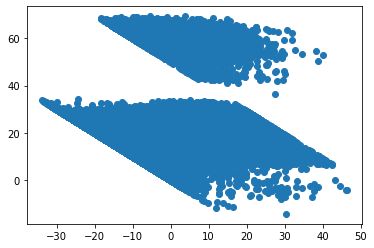

In [81]:
lrm_residual = y_test - lrm_y_pred

plt.scatter(lrm_residual, lrm_y_pred)

In [82]:
# lasso... nope

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)

In [83]:
print(r2_score(y_test, lasso_y_pred))
print(np.sqrt(mse(y_test, lasso_y_pred)))

0.5301891715884653
15.002569363268648


In [ ]:
# OLS... comparable results to linear regression

X = spotify_num.drop(columns = ['popularity'])
y = spotify_num['popularity']

X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

print(results.summary())

In [ ]:
scaler = MinMaxScaler()
cols = ['duration_s', 'tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])
y_train = y_train/100
y_test = y_test/100

In [ ]:
# KNN 
# Finding the best K value:

k_value = range(5, 201, 5)
test_rmse= []
train_rmse = []

In [ ]:
# This cell gets stuck!

for i in k_value:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_train_rmse = np.sqrt(mse(y_train, y_train_pred))
    y_test_pred = knn.predict(X_test)
    y_test_rmse = np.sqrt(mse(y_test, y_test_pred))
    test_rmse.append(y_test_rmse)
    train_rmse.append(y_train_rmse)

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
print(np.sqrt(mse(y_test, y_test_pred))*100)

# Modeling 2 classification

In [35]:
spotify_num['is_popular'] = np.where(spotify_num['popularity'] >= 50, 1, 0)


<ipython-input-35-0767b44f7dba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_num['is_popular'] = np.where(spotify_num['popularity'] >= 50, 1, 0)


In [36]:
spotify_num.sort_values('popularity', ascending = False)

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,liveness,mode,popularity,speechiness,tempo,valence,is_popular
20062,0.721,0.585,242.014,0.436,1,0.000013,0.1050,1,100,0.0601,143.874,0.132,1
19862,0.221,0.700,140.526,0.722,1,0.000000,0.2720,0,96,0.0369,90.989,0.756,1
19866,0.468,0.737,172.325,0.802,1,0.000000,0.0931,1,96,0.0878,144.015,0.682,1
19886,0.401,0.731,205.090,0.573,1,0.000052,0.1130,0,95,0.0544,109.928,0.145,1
19976,0.212,0.863,178.947,0.666,1,0.000493,0.1030,0,95,0.1520,163.908,0.838,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63064,0.982,0.530,199.227,0.204,0,0.004510,0.1430,0,0,0.1080,79.712,0.320,0
63063,0.994,0.209,162.623,0.245,0,0.916000,0.1280,1,0,0.0415,139.475,0.148,0
63062,0.154,0.800,95.700,0.328,1,0.000000,0.2670,1,0,0.9250,42.490,0.344,0
63061,0.958,0.276,370.787,0.172,0,0.633000,0.0651,1,0,0.0441,89.437,0.164,0


In [37]:
X = spotify_num.drop(columns = ['popularity', 'is_popular'])
y = spotify_num['is_popular']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
# KNN Classifier

neighbors = KNeighborsClassifier(n_neighbors = 5)

neighbors.fit(X_train, y_train)

neighbors.score(X_test, y_test)

0.8163885543895866

In [39]:
k_value = np.arange(5,201,5)
accuracy = []

for i in k_value:
    knnclass = KNeighborsClassifier(n_neighbors = i)
    knnclass.fit(X_train, y_train)
    accuracy.append(knnclass.score(X_test, y_test))

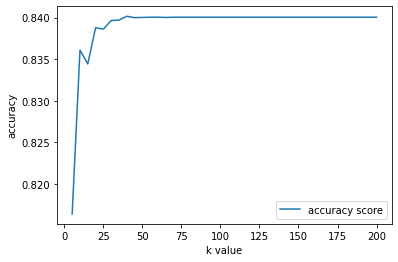

In [40]:
plt.plot(k_value, accuracy, label = 'accuracy score')
plt.legend()
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

In [41]:
k_value = np.arange(5,201,5)
accuracy = []

for i in k_value:
    knnclass = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    knnclass.fit(X_train, y_train)
    accuracy.append(knnclass.score(X_test, y_test))

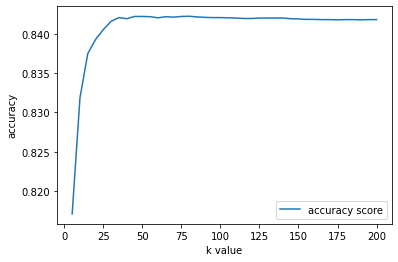

In [42]:
plt.plot(k_value, accuracy, label = 'accuracy score')
plt.legend()
plt.xlabel('k value')
plt.ylabel('accuracy')

plt.show()

In [43]:
max_y = max(accuracy)
max_x = k_value[accuracy.index(max_y)]
print('K value with the highest accuracy:', max_x, 'with an accuracy of', max_y.round(3))

K value with the highest accuracy: 80 with an accuracy of 0.842


In [61]:
knnclass = KNeighborsClassifier(n_neighbors = 80, weights = 'distance')
knnclass.fit(X_train, y_train)
knn_y_pred = knnclass.predict(X_test)

In [62]:
cm = confusion_matrix(y_test, knn_y_pred, labels = [0,1])
cm

array([[29179,   120],
       [ 5382,   197]], dtype=int64)

In [63]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     29299
           1       0.62      0.04      0.07      5579

    accuracy                           0.84     34878
   macro avg       0.73      0.52      0.49     34878
weighted avg       0.81      0.84      0.78     34878



In [55]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [65]:
clf.score(X_train, y_train)

0.8465353986424009

In [56]:
dot_data = tree.export_graphviz(
    clf, out_file=None,
    feature_names=X_train.columns,
    class_names=['Not Popular', 'Popular'],
    filled=True
)

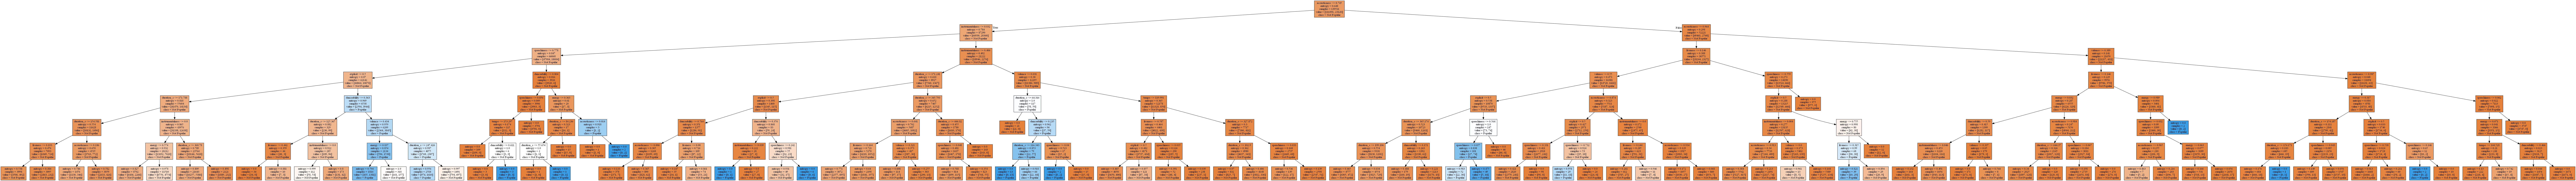

In [57]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [59]:
tree_y_pred = clf.predict(X_test)
tree_cm = confusion_matrix(y_test, tree_y_pred, labels = [0,1])
tree_cm

array([[28933,   366],
       [ 4849,   730]], dtype=int64)

In [60]:
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     29299
           1       0.67      0.13      0.22      5579

    accuracy                           0.85     34878
   macro avg       0.76      0.56      0.57     34878
weighted avg       0.83      0.85      0.81     34878



# Discussion and Conclusion 

For this analysis, I've explored and cleaned this dataset that had over 170,000 records, removing nulls, nonsense values and duplicate entries. 

I've started with regression models, but the further I delved into it, the more uncertainty I had with the methodology of the regression models. With a regular linear regression model, I had a root mean squared error of around 18 points of popularity, and an accuracy (r2 score of 0.3), which is evidently, not ideal. I started to dabble with another model for regression, such as lasso regression to account for outliers, and KNN. Regarding lasso regression, the accuracy shot to 0.17 and a higher root mean squared error of 19-20 popularity points. In addition, I ran into an issue with JupyterNotebook itself where I had a for-loop to find the best K value for KNN regression, but the my kernel would remain in stasis for a few hours, until I decided to go for a classification model.

For classification, I had much better results. Accuracy was around 0.80 - 0.82 for both the tree model and KNN classifier model. For the target variable, which is popularity, I converted it into a binary value, where any popularity value greater than or equal to 50, would be considered "popular" or "1", else is "not popular" or "0". I ran this through a KNN classifier and received a much better accuracy score, however one thing that stood out to me, was that on the classification report, there were far more True Negatives than True Positives. I think this is because of the balance of my data, where there were a considerable amount of songs that had a lower popularity rating given the condition that I placed.

I think given the time constraint and small amount of adjusting I did on the model, it would be safe to say that I could always explore more of the hyperparameters and parameters of each model, maybe even incorporate another type of model (was looking into SVM and logistic regression). I believe that I could achieve a better accuracy score with more fine tuning, as well find some interesting trends.

As of now, given the decision tree model with a criterion of entropy and max depth of 7, we currently have a model that has an accuracy of 84.7% in predicting if a song is considered to be "popular" or not. Furthurmore, because of the balance of the dataset, this model has an F1 score of 0.92 in successfully predicting a true negative vs. false negative.